# **PROCESAMIENTO DEL HABLA - TP 4** üíª

> üôãüèª‚Äç‚ôÇÔ∏è **Juan Andres Garcia Alves de Borba** (DNI 30182100)

## Actividades

### 1. Elaborar un dataset de preguntas y respuestas para crear un Chatbot para un aplicaci√≥n particular. (3 puntos)

- 1.1 Debe definir la aplicaci√≥n (atenci√≥n al cliente bancario, atenci√≥n a estudiantes universitarios, etc).  
- 1.2 El listado de preguntas y respuestas debe tener como m√≠nimo 20 elementos pregunta-respuesta.

### 2. Crear el chatbot utilizando TF-IDF y similitud del coseno. (1 punto)

### 3. Crear otro chatbot utilizando embeddings. (1 punto)

- Indique cu√°l embedding pre-entrenado eligi√≥.

### 4. Muestra ambos chatbots funcionando (1 punto)

- Adjuntar la lista de preguntas utilizadas para probar el funcionamiento.

### 5. A√±ade tus conclusiones de todo lo realizado (2 punto)

### 6. BONUS: usa lo realizado en 1 y 3 para crear un chatbot RAG. (2 puntos)

* Utiliza un modelo LLM pre-entrenado.

* Este punto no es obligatorio de realizar para quienes quieran regularizar / recuperar y luego rendir√°n en mesa.
* Para quienes tienen condiciones para promocionar (han realizado y entregado los TPs a tiempo) la resoluci√≥n de este ejercicio ser√° tenida en cuenta para sumar a la promoci√≥n.

### 7. No olvides:

* Explicar tus decisiones y configuraciones. A√±adir tus conclusiones.
* Anunciar en el foro cu√°l ser√° tu aplicaci√≥n y postear tu entrega y tus avances.
* Debes subir tu notebook a un repo GitHub p√∫blico de tu propiedad compartido + enlace colab.
* Documentar todo el proceso.





## ‚û°Ô∏è Chatbots Basados en Recuperaci√≥n

En ingl√©s information retrieval chatbots.

### ‚öôÔ∏è Motores de B√∫squeda

* B√∫squeda por palabras clave: Extrae palabras clave de la pregunta del usuario y busca coincidencias en las preguntas almacenadas.

* Similitud del coseno: Si has representado las preguntas como vectores (por ejemplo, usando TF-IDF o word embeddings), puedes usar la similitud del coseno para medir la distancia entre las preguntas.

* Word embeddings: Utiliza modelos de word embeddings como Word2Vec o BERT para obtener representaciones sem√°nticas de las preguntas y las consultas del usuario.

### ‚öôÔ∏è Instalaciones

In [ ]:
# !pip install spacy --quiet
# !python -m spacy download es_core_news_sm --quiet

In [ ]:
# import spacy
# nlp = spacy.load("es_core_news_sm")

# import es_core_news_sm
# nlp = es_core_news_sm.load()
# doc = nlp("Esto es una frase.")
# print([(w.text, w.pos_) for w in doc])

### üîé Ejemplo: B√∫squeda por Palabras Claves

In [ ]:
knowlegde_base = {
  "hola": "¬°Hola! ¬øEn qu√© puedo ayudarte?",
  "adi√≥s": "Hasta luego. ¬°Que tengas un buen d√≠a!",
  "informaci√≥n": "¬øQu√© tipo de informaci√≥n est√°s buscando?"
}

welcome = "Hola, soy Flufi, el chatbot de ..."
good_bye = "Chatbot: Hasta luego."
exit_cmd = ["salir", "fin", "terminar", "adios"]

In [ ]:
def answer_question(question):
  parsed_question = nlp(question.lower())  # Procesa la pregunta y convierte a min√∫sculas
  answer = "Lo siento, no entiendo tu pregunta."

  # Busca una coincidencia en el diccionario
  for word in parsed_question:

    # regresa la primer coincidencia que encuentra
    if word.text in knowlegde_base:
      answer = knowlegde_base[word.text]
      break

  return answer

In [ ]:
# print(welcome)
# while True:
#
#   user_input = input("T√∫: ")
#   if user_input.lower() in exit_cmd:
#     print(good_bye)
#     break
#
#   answer = answer_question(user_input)
#   print("Chatbot:", answer)

### üîé Ejemplo: B√∫squeda por Similitud

Para los chatbots basados ‚Äã‚Äãen recuperaci√≥n, es com√∫n utilizar bolsas de palabras (bag of words) o TF-IDF para calcular la similitud de intenciones.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Datos de ejemplo
questions = ["¬øQu√© es el aprendizaje autom√°tico?", "¬øC√≥mo funciona la regresi√≥n lineal?"]
answers = ["El aprendizaje autom√°tico es una rama de la inteligencia artificial...", "La regresi√≥n lineal es un m√©todo de modelado..."]

# Vectorizaci√≥n con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(questions)

In [ ]:
# Funci√≥n para encontrar la mejor coincidencia
def answer_question(question):

  question_vec = vectorizer.transform([question])
  similarities = cosine_similarity(question_vec, tfidf_matrix).flatten()
  print(similarities)

  idx_best_match = similarities.argmax()
  print(idx_best_match)

  return answers[idx_best_match]

In [ ]:
# Ejemplo de consulta
# question = "¬øQu√© es la regresi√≥n lineal?"
# print(answer_question(question))

### üîé Ejemplo: B√∫squeda por Similitud en Embeddings

Puedes vectorizar el texto usando embeddings, como vimos la clase pasada.


# **Tareas: Info Retrieval Chatbot**

> Para este Trabajo Pr√°ctico me voy a enfocar en un chatbot sobre el **FIFA Mundial de Clubes 2025**, que inicia este pr√≥ximo s√°bado 14/06/2025. ‚öΩ


## üõ†Ô∏è Setup & Configuraciones

üëâüèª Instalaciones (Puntos 1-5) ...

In [1]:
! pip install spacy --quiet
! python -m spacy download es_core_news_md --quiet
# ! python -m spacy download es_core_news_sm --quiet    # una opci√≥n m√°s ligera

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 20.2 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


üëâüèª Instalaciones (Puntos 6: RAG) ...

In [2]:
! pip install chromadb sentence-transformers transformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.3/19.3 MB 36.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.9/94.9 kB 5.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 284.2/284.2 kB 14.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 50.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [3]:
! pip install datasets evaluate ragas

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190.9/190.9 kB 8.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45.5/45.5 kB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.5/2.5 MB 38.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 438.1/438.1 kB 24.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 65.4/65.4 kB 4.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

üëâüèª Importar las librer√≠as (Puntos 1-5) ...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# cargar el modelo 'es_core_news_md' (otra opci√≥n: 'es_core_news_sm')
nlp = spacy.load("es_core_news_md")

üëâüèª Importar las librer√≠as (Punto 6: RAG) ...

In [47]:
import pandas as pd
from datasets import Dataset

import chromadb
from chromadb.utils import embedding_functions

from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

from ragas import evaluate
from ragas.metrics import context_recall, context_precision, faithfulness, answer_relevancy

üëâüèª Configuraciones generales ...

In [7]:
# mayor ancho en el print() antes que se genere un salto de l√≠nea
np.set_printoptions(linewidth=175)      # saltos de l√≠nea (otra opci√≥n: linewidth=np.inf)
np.set_printoptions(threshold=np.inf)   # ancho para los arrays (otra opci√≥n: np.inf)

# evitar la notaci√≥n cient√≠fica, valores con 3 decimales
np.set_printoptions(precision=3, suppress=True)

## üìö Punto 1. Elaborar un dataset de preguntas y respuestas. (3 puntos)

Elaborar un dataset de preguntas y respuestas para crear un Chatbot para una aplicaci√≥n particular.

üëâüèª Armar el dataset ...

Son 100 preguntas & respuestas... buscando un mejor c√≥digo, las voy a leer desde un archivo `.csv` que aloj√© en el repo del TP, en lugar de hardcodearlas en el c√≥digo fuente. üòÑ

In [8]:
url = "https://raw.githubusercontent.com/andres-garcia-alves/issd-ph/refs/heads/main/Trabajo%20Practico%2004/mundial_de_clubes_2025.csv"
df = pd.read_csv(url, sep=',')
df.head(3)

Pregunta  \
0           Qu√© es el Mundial de Clubes 2025   
1  D√≥nde se jugar√° el Mundial de Clubes 2025   
2                   Cu√°ndo empieza el torneo   

                                           Respuesta  
0  El Mundial de Clubes 2025 es un torneo interna...  
1  El Mundial de Clubes 2025 se jugar√° en Estados...  
2  El torneo est√° programado para comenzar el 14 ...

In [9]:
questions = []
answers = []

# pasar los datos del dataframe a las listas
for i in range(len(df)):
  questions.append(df["Pregunta"][i].lower())
  answers.append(df["Respuesta"][i])

# agregar la entrada correspondientes al saludo
questions.append("hola")
answers.append("Hola, soy 'Coraz√≥n Futbolero ‚öΩ', el chatbot de informaci√≥n sobre el FIFA Mundial de Clubes 2025.")

In [10]:
questions[:5]    # una muestra

['qu√© es el mundial de clubes 2025',
 'd√≥nde se jugar√° el mundial de clubes 2025',
 'cu√°ndo empieza el torneo',
 'cu√°ntos equipos participan en el mundial de clubes 2025',
 'c√≥mo se clasifican los equipos para el torneo']

In [11]:
answers[:5]    # una muestra

['El Mundial de Clubes 2025 es un torneo internacional de f√∫tbol organizado por la FIFA que reunir√° a 32 equipos de clubes de todo el mundo.',
 'El Mundial de Clubes 2025 se jugar√° en Estados Unidos, en distintas ciudades sede distribuidas por todo el pa√≠s.',
 'El torneo est√° programado para comenzar el 14 de junio y finalizar el 13 de julio de 2025.',
 'En esta edici√≥n participar√°n 32 equipos, representando a todas las confederaciones continentales.',
 'Los equipos se clasifican al Mundial de Clubes 2025 mediante el rendimiento en torneos continentales entre 2021 y 2024.']

üëâüèª Funciones auxiliares para preprocesar los inputs de usuario ...

In [12]:
# descargar las stopwords y armar un conjunto set() ordenado, con las stopwords del idioma espa√±ol
nltk.download('stopwords')
stopwords_es = sorted(set(stopwords.words('spanish')))

def remove_stopwords(text):
  splited_text = text.split()
  return ' '.join(w for w in splited_text if w not in stopwords_es)

questions = [remove_stopwords(question) for question in questions]
questions[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['mundial clubes 2025',
 'd√≥nde jugar√° mundial clubes 2025',
 'cu√°ndo empieza torneo',
 'cu√°ntos equipos participan mundial clubes 2025',
 'c√≥mo clasifican equipos torneo']

In [13]:
def preprocessing(text):

  text = text.lower()                               # pasar a a min√∫sculas
  text = re.sub(r'[.¬°!¬ø?\'\"‚Äú‚Äù‚Äò‚Äô¬´¬ª‚Ä¶]', '', text)    # eliminar signos de puntuaci√≥n y otros s√≠mbolos
  text = re.sub(r'\s+', ' ', text).strip()          # reemplazar m√∫ltiples espacios por uno solo
  text = re.sub(r'\.\.\.', '', text)                # eliminar puntos suspensivos
  text = re.sub(r'[^a-z√±\s]', '', text)             # eliminar cualquier caracter que no sea letra sin tilde o espacio
  # text = remove_stopwords(text)                   # eliminar stopwords

  return text

üëâüèª Funciones auxiliares para lematizar una pregunta / lista de preguntas ...

In [14]:
def lemmatice_question(question):

  question_nlp = nlp(question)

  question_lemmatized = " ".join([token.lemma_ for token in question_nlp])
  return question_lemmatized

In [15]:
def lemmatice_questions(questions):

  questions_nlp = [nlp(question) for question in questions]

  questions_lemmatized = []
  for question_nlp in questions_nlp:
    question_string = " ".join([token.lemma_ for token in question_nlp])
    questions_lemmatized.append(question_string)

  return questions_lemmatized

üëâüèª Lematizar las preguntas ...

In [16]:
questions_lemmatized = lemmatice_questions(questions)
questions_lemmatized[:10]    # una muestra

['mundial club 2025',
 'd√≥nde jugar mundial club 2025',
 'cu√°ndo empezar torneo',
 'cu√°ntos equipo participar mundial club 2025',
 'c√≥mo clasificar equipo torneo',
 'cu√°ntos equipo representar cada continente',
 'club clasificado',
 'club argentino torneo',
 'club brasile√±o',
 'participar alguno club mls']

 üëâüèª Observaciones ...

> üëÅÔ∏è‚Äçüó®Ô∏è Para facilitar la elaboraci√≥n del listado de preguntas & respuestas, le d√≠ algo de contexto a ChatGPT, y le ped√≠ que me genere un listado base de preguntas frecuentes.

> üëÅÔ∏è‚Äçüó®Ô∏è Luego contrast√© los resultados contra una docena de sitios (FIFA, peri√≥dicos, portales deportivos), tras lo cual tuve que hacerle varios ajustes. El detalle en la secci√≥n `Referencias`.

> üëÅÔ∏è‚Äçüó®Ô∏è De paso, incremento r√°pidamente de 20 a 100 las preguntas y respuestas. üí™üèª

> ‚úèÔ∏è Prompt: https://chatgpt.com/share/684a8c07-3948-8001-8da9-f02ba54415a1

## üí¨ Punto 2. Crear el chatbot utilizando TF-IDF y similitud del coseno. (1 punto)

üëâüèª Vectorizaci√≥n con TF-IDF ...

In [17]:
# crear la matriz tf-idf para todas las preguntas
tf_idf_vectorizer = TfidfVectorizer()

questions_vec = tf_idf_vectorizer.fit_transform(questions)
questions_lemmatized_vec = tf_idf_vectorizer.transform(questions_lemmatized)

üëâüèª Funci√≥n auxiliar para computar matrices TF-IDF ...

In [18]:
def compute_tf_idf(text):
  return tf_idf_vectorizer.transform([text])

üëâüèª Funci√≥n para encontrar la mejor coincidencia ...

In [19]:
def answer_question_v1(question_vec, questions_vec):

  # similitud del coseno
  similarities = cosine_similarity(question_vec, questions_vec).flatten()
  # print(similarities)

  # mejor coincidencia
  best_match_idx = similarities.argmax()
  best_match_sim = similarities.max()
  # print(best_match_idx, best_match_sim)

  return answers[best_match_idx], best_match_idx, best_match_sim

üëâüèª Ejemplo de consulta ...

In [20]:
question = "¬øQu√© es el mundial de clubes?"

# preprocesamiento
question = preprocessing(question)

# calcular la matriz tf-idf de la pregunta
question_vec = compute_tf_idf(question)

# buscar la mejor respuesta
answer_text, answer_idx, answer_sim = answer_question_v1(question_vec, questions_vec)

print(f"Answer similarity:  {answer_sim:2f}")
print(f"Answer index:       {answer_idx}")
print(f"Answer text:        {answer_text}")

Answer similarity:  0.763475
Answer index:       0
Answer text:        El Mundial de Clubes 2025 es un torneo internacional de f√∫tbol organizado por la FIFA que reunir√° a 32 equipos de clubes de todo el mundo.


## üí¨ Punto 3. Crear otro chatbot utilizando Embeddings. (1 punto)

Indique cu√°l embedding pre-entrenado eligi√≥.

üëâüèª Funciones auxiliares para computar embeddings ...

In [21]:
def compute_embedding(text):
  return nlp(text).vector

def compute_embeddings(texts):
  return [nlp(text).vector for text in texts]

üëâüèª Embedding pre-entrenado ...

Voy a estar utilizando modelo `es_core_news_md` de `spaCy` dada su facilidad de uso y velocidad de c√≥mputo.

In [22]:
# crear los embeddings para todas las preguntas
questions_nlp = compute_embeddings(questions)
questions_lemmatized_nlp = compute_embeddings(questions_lemmatized)

# questions_nlp[0]              # una muestra
# questions_lemmatized_nlp[0]   # una muestra

üëâüèª Funci√≥n para encontrar la mejor coincidencia ...

In [23]:
def answer_question_v2(question_nlp, questions_nlp):

  # similitud del coseno
  similarities = cosine_similarity([question_nlp], questions_nlp).flatten()
  # print(similarities)

  # mejor coincidencia
  best_match_idx = similarities.argmax()
  best_match_sim = similarities.max()
  # print(best_match_idx, best_match_sim)

  return answers[best_match_idx], best_match_idx, best_match_sim

üëâüèª Ejemplo de consulta ...

In [24]:
question = "¬øQu√© es el mundial de clubes?"

# preprocesamiento
question = preprocessing(question)

# calcular el embedding de la pregunta
question_nlp = compute_embedding(question)

# buscar la mejor respuesta
answer_text, answer_idx, answer_sim = answer_question_v2(question_nlp, questions_nlp)

print(f"  Answer similarity:  {answer_sim:.2f}")
print(f"  Answer index:       {answer_idx}")
print(f"  Answer text:        {answer_text}")

  Answer similarity:  0.41
  Answer index:       5
  Answer text:        La distribuci√≥n incluye: UEFA (12), CONMEBOL (6), AFC (4), CAF (4), CONCACAF (4), OFC (1) y 1 cupo para el anfitri√≥n.


## üìå Punto 4. Muestra ambos chatbots funcionando. (1 punto)

Adjuntar la lista de preguntas utilizadas para probar el funcionamiento.

üëâüèª Variables para los textos de saludo final, pregunta desconocida, y la respuesta al comando 'salir' ...

In [25]:
good_bye = "Hasta luego. ¬°Que tengas un buen d√≠a!"
unknown = "Lo siento, no entiendo tu pregunta."

# mejora (al bot de ejemplo):
# con este array es m√°s flexible para los usuarios el comando 'salir'
exit_cmd = ["salir", "fin", "terminar", "bye", "adios", "adi√≥s"]

üëâüèª El chatbot **'Coraz√≥n Futbolero v1'** ‚öΩ (basado en `TF-IDF`) en acci√≥n ...

In [26]:
def run_chatbot_v1():
  print("Usa finalizar puedes escribir:", exit_cmd, "\n")

  while True:
    question = input("üí¨ T√∫:  ")

    # preprocesamiento
    question = preprocessing(question)

    # chequear si el input es el comando 'salir'
    if question in exit_cmd:
      print("üí¨ Bot:", good_bye)
      break

    # calcular el embedding de la pregunta
    question_vec = compute_tf_idf(question)

    # buscar la mejor respuesta (tf-idf)
    answer_text, answer_idx, answer_sim = answer_question_v1(question_vec, questions_vec)

    # mostrar la respuesta solo si la similitud fue de al menos un 25%
    if answer_sim > 0.25: print("üí¨ Bot:", answer_text, "\n")
    else:                 print("üí¨ Bot:", unknown, "\n")

In [27]:
# run_chatbot_v1()

üëâüèª El chatbot **'Coraz√≥n Futbolero v2'** ‚öΩ (basado en `Embeddings`) en acci√≥n ...

In [28]:
def run_chatbot_v2():
  print("Usa finalizar puedes escribir:", exit_cmd, "\n")

  while True:
    question = input("üí¨ T√∫:  ")

    # preprocesamiento
    question = preprocessing(question)

    # chequear si el input es el comando 'salir'
    if question in exit_cmd:
      print("üí¨ Bot:", good_bye)
      break

    # calcular el embedding de la pregunta
    question_nlp = compute_embedding(question)

    # buscar la mejor respuesta (embeddings)
    answer_text, answer_idx, answer_sim = answer_question_v2(question_nlp, questions_nlp)

    # mostrar la respuesta solo si la similitud fue de al menos un 25%
    if answer_sim > 0.25: print("üí¨ Bot:", answer_text, "\n")
    else:                 print("üí¨ Bot:", unknown, "\n")

In [29]:
# run_chatbot_v2()

üëâüèª Lista de preguntas utilizadas para probar el funcionamiento (20 preguntas) ...

In [30]:
# formato: input del usuario + idx de la respuesta correcta
test_questions = [
  ("Hola", 100),
  ("¬øQu√© es?", 0),
  ("Que es el Mundial de Clubes", 0),
  ("Donde se juega", 1),
  ("Cu√°ndo empieza", 2),
  ("Cuantos equipos participan", 3),
  ("Estadios", 18),
  ("Donde comprar las estradas", 22),
  ("premios para el campe√≥n", 38),
  ("streaming", 53),
  ("El bal√≥n oficial", 72),
  ("C√≥mo se eligen los √°rbitros?", 34),
  ("clubes argentinos", 7),
  ("clubes brasile√±os", 8),
  ("¬øQu√© sucede si hay empate en puntos?", 13),
  ("Qu√© sucede si hay empate en octavos", 60),
  ("¬øCuantos cambios por partido?", 64),
  ("VAR", 35),
  ("ver partidos desde Argentina", 31),
  ("¬øHabr√° tiempo adicional?", 66)
]

test_size = len(test_questions)

üëâüèª Comparando resultados ...

In [31]:
def check_results(correct_idx, answer_idx):
  result = 1 if answer_idx == correct_idx else 0
  return result

def show_results(title, correct_idx, answer_idx, answer_text):
  status = "OK " if answer_idx == correct_idx else "MAL"
  print(f"  { title } - Status: { status } (IDX { answer_idx }), TEXT: { answer_text }")

In [32]:
tf_idf_base_count = 0
tf_idf_lemma_count = 0
embeddings_base_count = 0
embeddings_lemma_count = 0

for question, correct_idx in test_questions:
  print(f"* Pregunta: '{ question }' (IDX correcto { correct_idx })")

  # preprocesamiento
  question = preprocessing(question)

  # lematizar
  question_lemmatized = lemmatice_question(question)

  # calcular ambas matrices tf-idf de la pregunta
  question_vec = compute_tf_idf(question)
  question_lemmatized_vec = compute_tf_idf(question_lemmatized)

  # calcular ambos embeddings de la pregunta
  question_nlp = compute_embedding(question)
  question_lemmatized_nlp = compute_embedding(question_lemmatized)

  # pregunta al chatbot basado en tf-idf (base)
  answer_text, answer_idx, answer_sim = answer_question_v1(question_vec, questions_vec)
  tf_idf_base_count += check_results(correct_idx, answer_idx)
  show_results("TF-IDF (base)   ", correct_idx, answer_idx, answer_text)

  # pregunta al chatbot basado en tf-idf+lematizacion
  answer_text, answer_idx, answer_sim = answer_question_v1(question_lemmatized_vec, questions_lemmatized_vec)
  tf_idf_lemma_count += check_results(correct_idx, answer_idx)
  show_results("TF-IDF+Lemma    ", correct_idx, answer_idx, answer_text)

  # pregunta al chatbot basado en embeddings (base)
  answer_text, answer_idx, answer_sim = answer_question_v2(question_nlp, questions_nlp)
  embeddings_base_count += check_results(correct_idx, answer_idx)
  show_results("Embedding (base)", correct_idx, answer_idx, answer_text)

  # pregunta al chatbot basado en embeddings+lematizacion
  answer_text, answer_idx, answer_sim = answer_question_v2(question_lemmatized_nlp, questions_lemmatized_nlp)
  embeddings_lemma_count += check_results(correct_idx, answer_idx)
  show_results("Embedding+Lemma ", correct_idx, answer_idx, answer_text)

  print()

* Pregunta: 'Hola' (IDX correcto 100)
  TF-IDF (base)    - Status: OK  (IDX 100), TEXT: Hola, soy 'Coraz√≥n Futbolero ‚öΩ', el chatbot de informaci√≥n sobre el FIFA Mundial de Clubes 2025.
  TF-IDF+Lemma     - Status: OK  (IDX 100), TEXT: Hola, soy 'Coraz√≥n Futbolero ‚öΩ', el chatbot de informaci√≥n sobre el FIFA Mundial de Clubes 2025.
  Embedding (base) - Status: OK  (IDX 100), TEXT: Hola, soy 'Coraz√≥n Futbolero ‚öΩ', el chatbot de informaci√≥n sobre el FIFA Mundial de Clubes 2025.
  Embedding+Lemma  - Status: OK  (IDX 100), TEXT: Hola, soy 'Coraz√≥n Futbolero ‚öΩ', el chatbot de informaci√≥n sobre el FIFA Mundial de Clubes 2025.

* Pregunta: '¬øQu√© es?' (IDX correcto 0)
  TF-IDF (base)    - Status: OK  (IDX 0), TEXT: El Mundial de Clubes 2025 es un torneo internacional de f√∫tbol organizado por la FIFA que reunir√° a 32 equipos de clubes de todo el mundo.
  TF-IDF+Lemma     - Status: OK  (IDX 0), TEXT: El Mundial de Clubes 2025 es un torneo internacional de f√∫tbol organizado por

üëâüèª Totalizar Resultados ...

In [33]:
tf_idf_base_percent       = int(tf_idf_base_count / test_size * 100)
tf_idf_lemma_percent      = int(tf_idf_lemma_count / test_size * 100)
embeddings_base_percent   = int(embeddings_base_count / test_size * 100)
embeddings_lemma_percent  = int(embeddings_lemma_count / test_size * 100)

print(f"Chatbot TF-IDF de base:           { tf_idf_base_count }/{ test_size } ({ tf_idf_base_percent }%) aciertos.")
print(f"Chatbot TF-IDF+Lematizacion:      { tf_idf_lemma_count }/{ test_size } ({ tf_idf_lemma_percent }%) aciertos.")
print(f"Chatbot Embeddings de base:       { embeddings_base_count }/{ test_size } ({ embeddings_base_percent }%) aciertos.")
print(f"Chatbot Embeddings+Lematizacion:  { embeddings_lemma_count }/{ test_size } ({ embeddings_lemma_percent }%) aciertos.")

Chatbot TF-IDF de base:           15/20 (75%) aciertos.
Chatbot TF-IDF+Lematizacion:      9/20 (45%) aciertos.
Chatbot Embeddings de base:       9/20 (45%) aciertos.
Chatbot Embeddings+Lematizacion:  7/20 (35%) aciertos.


üëâüèª Observaciones ...

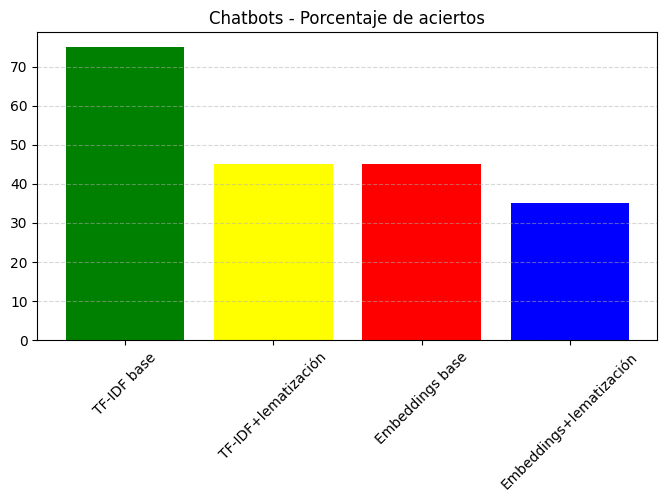

In [34]:
chatbots  = ["TF-IDF base", "TF-IDF+lematizaci√≥n", "Embeddings base", "Embeddings+lematizaci√≥n"]
data      = [tf_idf_base_percent, tf_idf_lemma_percent, embeddings_base_percent, embeddings_lemma_percent]
colors    = ["Green", "Yellow", "Red", "Blue"]

fig = plt.figure(figsize=(8, 4))
plt.title("Chatbots - Porcentaje de aciertos")
plt.bar(chatbots, data, color=colors)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()

üëÅÔ∏è‚Äçüó®Ô∏è El chatbot basado en TF-IDF alcanz√≥ un 80% de aciertos para el set de preguntas elegido.

üëÅÔ∏è‚Äçüó®Ô∏è Por el otro lado, el chatbot basado en Embeddings alcanz√≥ un magro 30% de aciertos para el mismo set de preguntas.

## üí° Punto 5. A√±ade tus conclusiones de todo lo realizado (2 punto)

üëÅÔ∏è‚Äçüó®Ô∏è Considerando que **originalmente**:
- No se aplic√≥ eliminaci√≥n de `stop-words`, ni del input del usuario, ni al momento de armar los `TF-IDF`/`embeddings` para ambos chatbots
- No se utilizaron t√©cnicas de `steaming`/`lematizaci√≥n`, ni sobre el input del usuario, ni sobre las preguntas disponibles para ambos chatbots
- (aunque se incluye un preprocesamiento b√°sico al input de usuario) ...

üëÅÔ∏è‚Äçüó®Ô∏è Que el chatbot basado en `TF-IDF`, utilizando solamente la `similitud del coseno`, est√© logrando un `80% de aciertos` me parece sorprendente, y una muy buena base para una mejora posterior. üëçüèª

üëÅÔ∏è‚Äçüó®Ô∏è Por otro, lado en comparaci√≥n, me llama la atenci√≥n lo mal que se ha desempe√±ado el segundo chatbot, basado en los modelos de `spaCy`. Originalmente estaba con el `es_core_news_sm`, el cual luego cambi√© a `es_core_news_md`, para probar si mejoraba el desempe√±o.  
Para ambos casos obtuve el mismo resultado: 6/20 (30%) aciertos.

üëÅÔ∏è‚Äçüó®Ô∏è Cuando posteriormente agregu√© `lematizaci√≥n`, el chatbot basado en `embedding` mejor√≥ marginalmente.  
Por otro lado el chatbot basado en `TF-IDF` (que ven√≠a bastante bien) redujo su tasa de aciertos a la mitad. üôÉ

## üíé Punto 6. (BONUS) Usa lo realizado en 1 y 3 para crear un chatbot RAG. (2 puntos)

üëâüèª Formatear los datos ...

In [35]:
# unir las preguntas y respuestas para su indexacion posterior
df["Contenido"] = df["Pregunta"] + " " + df["Respuesta"]
df.head(3)

Pregunta  \
0           Qu√© es el Mundial de Clubes 2025   
1  D√≥nde se jugar√° el Mundial de Clubes 2025   
2                   Cu√°ndo empieza el torneo   

                                           Respuesta  \
0  El Mundial de Clubes 2025 es un torneo interna...   
1  El Mundial de Clubes 2025 se jugar√° en Estados...   
2  El torneo est√° programado para comenzar el 14 ...   

                                           Contenido  
0  Qu√© es el Mundial de Clubes 2025 El Mundial de...  
1  D√≥nde se jugar√° el Mundial de Clubes 2025 El M...  
2  Cu√°ndo empieza el torneo El torneo est√° progra...

üëâüèª Inicializar ChromaDB + Embedding model ...

In [36]:
embedding_model = "all-MiniLM-L6-v2"

# crear una instancia de la DB vectorial
chroma_client = chromadb.Client()

# crear una funci√≥n de embeddings basada en SentenceTransformer
# es la que utiliza luego ChromaDB para convertir el texto en vectores num√©ricos
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name=embedding_model)

# crear la colecci√≥n de vectores en ChromaDB (asociada al modelo de embeddings)
db_collection = chroma_client.create_collection(name="faq_rag", embedding_function=sentence_transformer_ef, get_or_create=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

üëâüèª Indexar documentos ...

In [37]:
# agregar los documentos a la colecci√≥n
db_collection.add(
  ids=[str(i) for i in range(len(df))],     # id
  documents=df["Contenido"].tolist(),       # contenido del documento
  metadatas=[{"pregunta": q, "respuesta": r} for q, r in zip(df["Pregunta"], df["Respuesta"])] # permite filtrar por campos individuales
)

üëâüèª Modelo generador ...

In [38]:
generative_model = "google/flan-t5-base"   # otra opciones: "google/flan-t5-base", "google/flan-t5-small"

# el tokenizer convierte el texto en IDs numericos para que puedan procesarse en el modelo
tokenizer = AutoTokenizer.from_pretrained(generative_model)

# modelo Seq2Seq (texto a texto) para generar las respuestas en lenguaje natural
# a partir de un prompt que combina el contexto recuperado + la pregunta del usuario.
generator = AutoModelForSeq2SeqLM.from_pretrained(generative_model)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

üëâüèª Funci√≥n de respuesta ...

In [39]:
def answer_question_v3(question, top_k=3):

  # buscar en ChromaDB los documentos m√°s relevantes
  results = db_collection.query(query_texts=[question], n_results=top_k)
  documents = results["documents"][0]
  context = "\n".join(documents)

  # crear el prompt con el contexto + la pregunta del usuario
  prompt = f"Contexto:\n{ context }\n\nPregunta: { question }\nRespuesta:"

  # tokenizar el prompt
  input_ids = tokenizer(prompt, return_tensors="pt", truncation=True).input_ids

  # generar la respuesta, 200 nuevos tokens como m√°ximo (adicionales a los del prompt original)
  output_ids = generator.generate(input_ids, max_new_tokens=200)
  response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

  return response

> üëÅÔ∏è‚Äçüó®Ô∏è Cuando se le pasa el `prompt`, el modelo no tiene una comprensi√≥n expl√≠cita de "qu√© es contexto" y "qu√© es pregunta".

> üëÅÔ∏è‚Äçüó®Ô∏è Pero s√≠ puede aprender a diferenciarlo al indic√°rselo claramente.  
De ah√≠ que el `prompt` se arme como: `'Contexto:\n{context}\n\nPregunta: {question}\nRespuesta:'`.

> üëÅÔ∏è‚Äçüó®Ô∏è Buscando sobre este tema... este tipo de prompts se consideran estructurados de **forma instructiva**, lo que resulta √∫til para modelos como `Flan-T5-*`, que fueron ajustados para este tipo de instrucciones. El modelo "entiende" que debe completar la parte despu√©s de `'Respuesta:'`.

> üëÅÔ∏è‚Äçüó®Ô∏è De ah√≠ el nombre de esta famila de modelos: `Fine-tuned LAnguage Net (FLAN)`, que est√°n afinados con un enfoque instructivo.

üëâüèª El chatbot **'Coraz√≥n Futbolero v3'** ‚öΩ (basado en `TF-IDF`) en acci√≥n ...

In [40]:
def run_chatbot_v3():
  print("Usa finalizar puedes escribir:", exit_cmd, "\n")

  while True:
    question = input("üí¨ T√∫:  ")

    # preprocesamiento
    question = preprocessing(question)

    # chequear si el input es el comando 'salir'
    if question in exit_cmd:
      print("üí¨ Bot:", good_bye)
      break

    answer_text = answer_question_v3(question)
    print("üí¨ Bot:", answer_text, "\n")

In [ ]:
# run_chatbot_v3()

## üíé Punto 7. (PROPIO): Evaluando el rendimiento

üëâüèª Funciones auxiliares (aplican la misma l√≥gica que en partes del Punto 6) ...

In [41]:
def build_context(question, n_results=3):
  # buscar en ChromaDB los documentos m√°s relevantes
  results = db_collection.query(query_texts=[question], n_results=n_results)
  documents = results["documents"][0]
  return documents

def build_answer(question, contexto):
  # crear el prompt con el contexto + la pregunta del usuario
  prompt = f"Contexto:\n{ contexto }\n\nPregunta: { question }\nRespuesta:"

  # tokenizar el prompt
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids
  output_ids = generator.generate(input_ids, max_new_tokens=200)
  response = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
  return response

In [42]:
df.head(3)

Pregunta  \
0           Qu√© es el Mundial de Clubes 2025   
1  D√≥nde se jugar√° el Mundial de Clubes 2025   
2                   Cu√°ndo empieza el torneo   

                                           Respuesta  \
0  El Mundial de Clubes 2025 es un torneo interna...   
1  El Mundial de Clubes 2025 se jugar√° en Estados...   
2  El torneo est√° programado para comenzar el 14 ...   

                                           Contenido  
0  Qu√© es el Mundial de Clubes 2025 El Mundial de...  
1  D√≥nde se jugar√° el Mundial de Clubes 2025 El M...  
2  Cu√°ndo empieza el torneo El torneo est√° progra...

üëâüèª Evaluando el rendimiento (m√©tricas) ...

In [43]:
contexts = []
responses = []

df_aux = df.head(10)  # si se quiere acelerar, que esta parte demora una banda ...
# df_aux = df         # para evaluar sobre todas las preguntas

for question in df_aux["Pregunta"]:
  docs = build_context(question)
  contexts.append(docs)
  respuesta = build_answer(question, "\n".join(docs))
  responses.append(respuesta)

data_dict = {
  "question": df_aux["Pregunta"].tolist(),
  "contexts": contexts,
  "response": responses,
  "ground_truth": df_aux["Respuesta"].tolist()
}

ds_ragas = Dataset.from_dict(data_dict)

üëâüèª Las nuevas versiones de `Ragas` usan modelos de `OpenAI` ...

> La versi√≥n actual de `Ragas` (`v0.2.15`) por detr√°s usa modelos (pagos) de `OpenAI`.  
Tras investigar un poco encontr√© que hasta la `v0.1.15` funcionaba sin `OpenAI`.

> Prob√© forzando la versi√≥n con `!pip install ragas==0.1.15`, pero solo me llev√≥ a horas de prueba y error por errores en dependencias cruzadas con las otras librer√≠as en uso.  
La versi√≥n vieja fuerza versiones antiguas en otros paquetes, y luego esas versiones antiguas generan errores en `NLTK`, `spaCy`, y otros.

> Hasta prob√© de llevarme el c√≥digo de este `Punto 7` y sus librer√≠as indispensables a un notebook aparte (con la idea de transportar luego los datos con un `.csv` de por medio), pero a√∫n as√≠ la versi√≥n vieja gener√≥ otros errores con los paquetes `sentence_transformers` y `chromadb`, que son indispensables para esta consigna.

> Ni de broma dejo mi API Key expuesta en un GitHub p√∫blico o video de YT...  
Si se quiere re-ejecutar la √∫ltima celda del notebook donde se eval√∫an las m√©tricas, de debe completar la siguiente celda con una API Key v√°lida. ü§≠

In [45]:
import os
os.environ["OPENAI_API_KEY"] = "api-key"

In [48]:
# las otras 2 m√©tricas 'faithfulness' y 'answer_relevancy' requieren API Key de OpenAI
results = evaluate(dataset=ds_ragas, metrics=[context_recall, context_precision, faithfulness, answer_relevancy])
print(results)

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

{'context_recall': 1.0000, 'context_precision': 0.9667, 'faithfulness': 0.9833, 'answer_relevancy': 0.7932}


> üëÅÔ∏è‚Äçüó®Ô∏è De la etapa `Retrieval` (del contexto):
  - `Context Recall`: Mide que tan bien el contexto recuperado cubre la respuesta esperada.
  - `Context Precision`: Mide que proporci√≥n del contexto recuperado es √∫til para responder la pregunta. Penaliza el contexto irrelevante (ruido).

> üëÅÔ∏è‚Äçüó®Ô∏è De la etapa `Reader` (del generador):
  - `Faithfulness`: Mide que tanto la respuesta generada se basa en el contexto recuperado. Util para detectar 'alucinaciones'.
  - `Answer Relevance`: Eval√∫a si realmente responde a lo que se pregunt√≥.

> üëÅÔ∏è‚Äçüó®Ô∏è Las m√©tricas `faithfulness` y `answer_relevancy` requieren una API Key de OpenAI.

> üëÅÔ∏è‚Äçüó®Ô∏è Bastante bien los resultados:  
  - `context_recall: 1.00`  
  - `context_precision: 0.97`  
  - `faithfulness: 0.98`  
  - `answer_relevancy: 0.79`


## ‚ùó &nbsp;Punto 7. No olvides ...

* Explicar tus decisiones y configuraciones. A√±adir tus conclusiones.

* Anunciar en el foro cu√°l ser√° tu aplicaci√≥n y postear tu entrega y tus avances.

* Debes subir tu notebook a un repo GitHub p√∫blico de tu propiedad compartido + enlace colab.

* Documentar todo el proceso.

## üìö Referencias

- Workflow para RAG  
https://chatgpt.com/share/684d305c-b52c-8001-a25d-7d597a816bbf

- Comparativa entre modelos generativos (elecci√≥n de `google/flan-t5-small`)  
https://chatgpt.com/share/684d3dea-6b84-8001-8834-1d5d900f7174


<hr>

- Mundial de Clubes 2025 - Canci√≥n oficial  
https://www.fifa.com/es/tournaments/mens/club-world-cup/usa-2025/articles/emblema-cancion-oficial-revelados-mundial-de-clubes-fifa-2025

- Mundial de Clubes 2025 - Ciudades y Estadios  
https://cnnespanol.cnn.com/2025/06/12/deportes/mundial-clubes-2025-ciudades-estadios-orix  
https://www.olympics.com/es/noticias/mundial-clubes-2025-sedes-fifa-torneo

- Mundial de Clubes 2025 - Confederaciones y Clubes clasificados  
https://www.espn.com.ar/futbol/mundial-clubes/nota/_/id/13303133/todos-los-clasificados-al-super-mundial-de-clubes-2025-de-la-fifa

- Mundial de Clubes 2025 - Cronograma  
https://digitalhub.fifa.com/m/83583980e0bb1fb/original/FCWC25-Match-Schedule.pdf

- Mundial de Clubes 2025 - Entradas  
https://www.fifa.com/es/tournaments/mens/club-world-cup/usa-2025/tickets

- Mundial de Clubes 2025 - Lugar y fecha de la final  
https://www.beinsports.com/es-us/football/fifa-club-world-cup/articles-video/-cu%C3%A1ndo-y-d%C3%B3nde-se-juega-la-final-del-mundial-de-clubes-2025-2025-06-11

- Mundial de Clubes 2025 - Premios econ√≥micos  
https://www.fifa.com/es/tournaments/mens/club-world-cup/usa-2025/articles/modelo-reparto-economico  
https://bolavip.com/mundial-de-clubes/la-fifa-pagara-mas-de-100-millones-de-dolares-al-equipo-que-gane-el-mundial-de-clubes

- Mundial de Clubes 2025 - Referees  
https://inside.fifa.com/es/refereeing/news/designados-arbitros-historico-mundial-de-clubes-fifa-2025

- Mundial de Clubes 2025 - Transmisiones  
https://www.ole.com.ar/futbol-internacional/mundial-de-clubes/ver-mundial-clubes-horario-canales-plataformas-partidos-river-boca_0_jwEaX8LUsU.html
